<a href="https://colab.research.google.com/github/IAMPathak2702/PlantWatch-Pro--Your-Green-Guardian/blob/READ.md/PlantWatch-pro-Green.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Relevant Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import keras
from keras import layers,Sequential

import os
import random
import pathlib

## Setting up Kaggle Environment

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = '/content'

## Downloading the dataset from Kaggle

In [ ]:
!kaggle datasets download -d arjuntejaswi/plant-village

 99% 326M/329M [00:16<00:00, 23.8MB/s]
100% 329M/329M [00:16<00:00, 21.1MB/s]


### unzipping data

In [ ]:
!unzip \*.zip

## Converting and spliting the data into Tensorflow train and validation dataset

In [ ]:
for dirpath, dirnames, filenames in os.walk("PlantVillage"):

  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 15 directories and 0 images in 'PlantVillage'.
There are 0 directories and 1676 images in 'PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite'.
There are 0 directories and 1000 images in 'PlantVillage/Potato___Early_blight'.
There are 0 directories and 1591 images in 'PlantVillage/Tomato_healthy'.
There are 0 directories and 1478 images in 'PlantVillage/Pepper__bell___healthy'.
There are 0 directories and 152 images in 'PlantVillage/Potato___healthy'.
There are 0 directories and 1000 images in 'PlantVillage/Tomato_Early_blight'.
There are 0 directories and 1771 images in 'PlantVillage/Tomato_Septoria_leaf_spot'.
There are 0 directories and 952 images in 'PlantVillage/Tomato_Leaf_Mold'.
There are 0 directories and 2127 images in 'PlantVillage/Tomato_Bacterial_spot'.
There are 0 directories and 1404 images in 'PlantVillage/Tomato__Target_Spot'.
There are 0 directories and 373 images in 'PlantVillage/Tomato__Tomato_mosaic_virus'.
There are 0 directories and 1909 images in 

### setting global Variable for data Visualization

In [ ]:
IMAGE_SIZE = (256,256)
BATCH_SIZE = 32

In [ ]:
train_ds =     keras.preprocessing.image_dataset_from_directory('/content/PlantVillage/',
                                                                shuffle = True,
                                                                image_size=IMAGE_SIZE,
                                                                validation_split=0.2,
                                                                seed = 42,
                                                                batch_size = BATCH_SIZE,
                                                                subset='training',
                                                                label_mode='categorical'
                                                           )

val_ds  =  keras.preprocessing.image_dataset_from_directory('/content/PlantVillage/',
                                                            shuffle = True,
                                                            image_size=IMAGE_SIZE,
                                                            validation_split=0.2,
                                                            seed=42,
                                                            batch_size = BATCH_SIZE,
                                                            subset='validation',
                                                            label_mode='categorical')



Found 20638 files belonging to 15 classes.
Using 16511 files for training.
Found 20638 files belonging to 15 classes.
Using 4127 files for validation.


# Splitting the data into ****train,test and validation dataset****.

train_dataset contain 80%
where as test and validation dataset wil have 10% each

In [ ]:
val_dataset = val_ds.take(int(len(val_ds)*0.5))
test_dataset = val_ds.skip(int(len(val_ds)*0.5))

In [ ]:
train_dataset = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
len(train_dataset) , len(val_dataset),len(test_dataset)

(516, 64, 65)

### Extracting class names from the dataset

In [ ]:
class_names = train_ds.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

# Visualising the data

### Creating a function to visualize our dataset

In [ ]:
def view_random_image(target_dir, class_names):
    # Setup target directory (we'll view images from here)

    plt.figure(figsize = (20,14))
    for i in range(0,12):
        target_class = random.choice(list(class_names))
        target_folder = target_dir+target_class
        # Get a random image path
        random_image = random.sample(os.listdir(target_folder), 1)
        # Read in the image and plot it using matplotlib

        img = mpimg.imread(target_folder + "/" + random_image[0])
        ax = plt.subplot(3,4,i+1)
        plt.imshow(img)
        plt.title(f"{target_class}--{img.shape}")
        plt.axis("off");
    return img

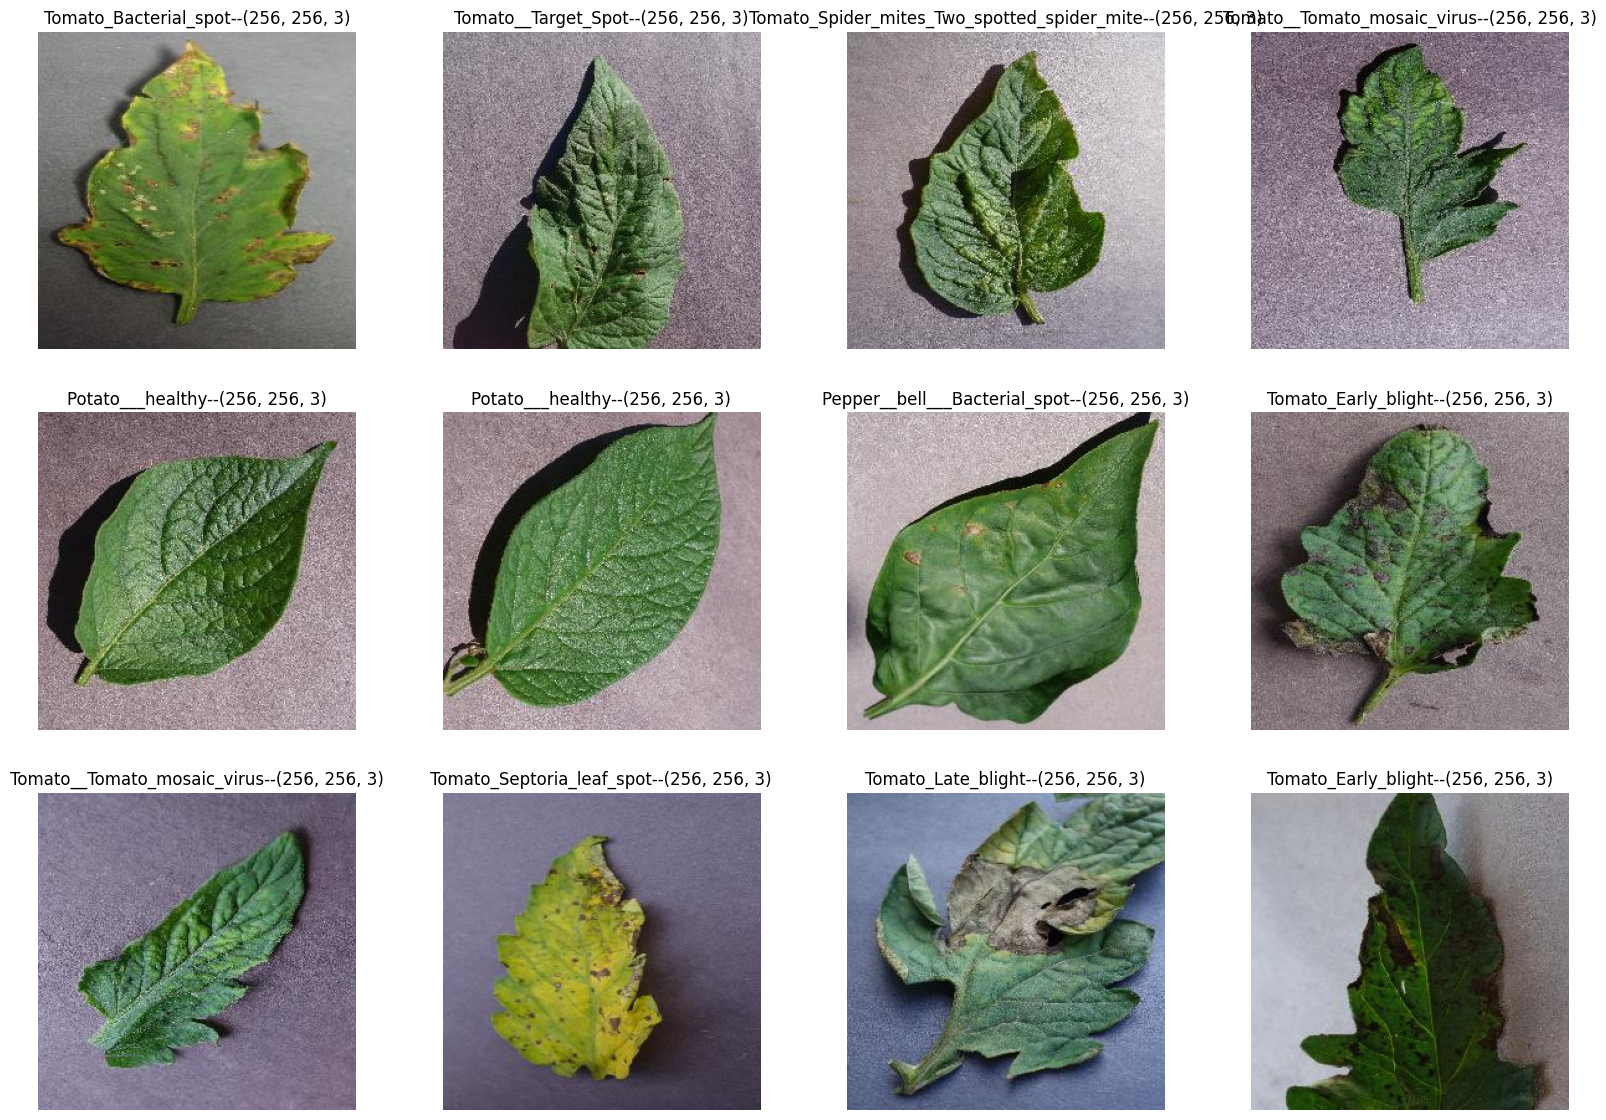

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="/content/PlantVillage/",
                        class_names = class_names)

# Creating an Data Augumentation layer

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),  # Rescale pixel values
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),  # Randomly flip images horizontally and vertically
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),  # Randomly rotate images up to 20 degrees
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),  # Randomly zoom images up to 20%
],name = "Data_Augumentation_layer")

In [ ]:
input = layers.Input(shape = (256,256,3))
x = data_augmentation(input)
x = layers.Conv2D(32 , (3,3),activation = 'relu')(x)
x = layers.Conv2D(32 , (3,3),activation = 'relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(32 , (3,3),activation = 'relu')(x)
x = layers.Conv2D(32 , (3,3),activation = 'relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(32 , (3,3),activation = 'relu')(x)
x = layers.Conv2D(32 , (3,3),activation = 'relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(32 , (3,3),activation = 'relu')(x)
x = layers.Conv2D(32 , (3,3),activation = 'relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(32 , (3,3),activation = 'relu')(x)
x = layers.Conv2D(32 , (3,3),activation = 'relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
x= layers.Dense(64, activation ='relu')(x)
output = layers.Dense(15, activation = 'softmax')(x)

model_1 = tf.keras.Model(input,output , name = "Dense_model_1")

model_1.summary()

Model: "Dense_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 Data_Augumentation_layer (  (None, 256, 256, 3)       0         
 Sequential)                                                     
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)    

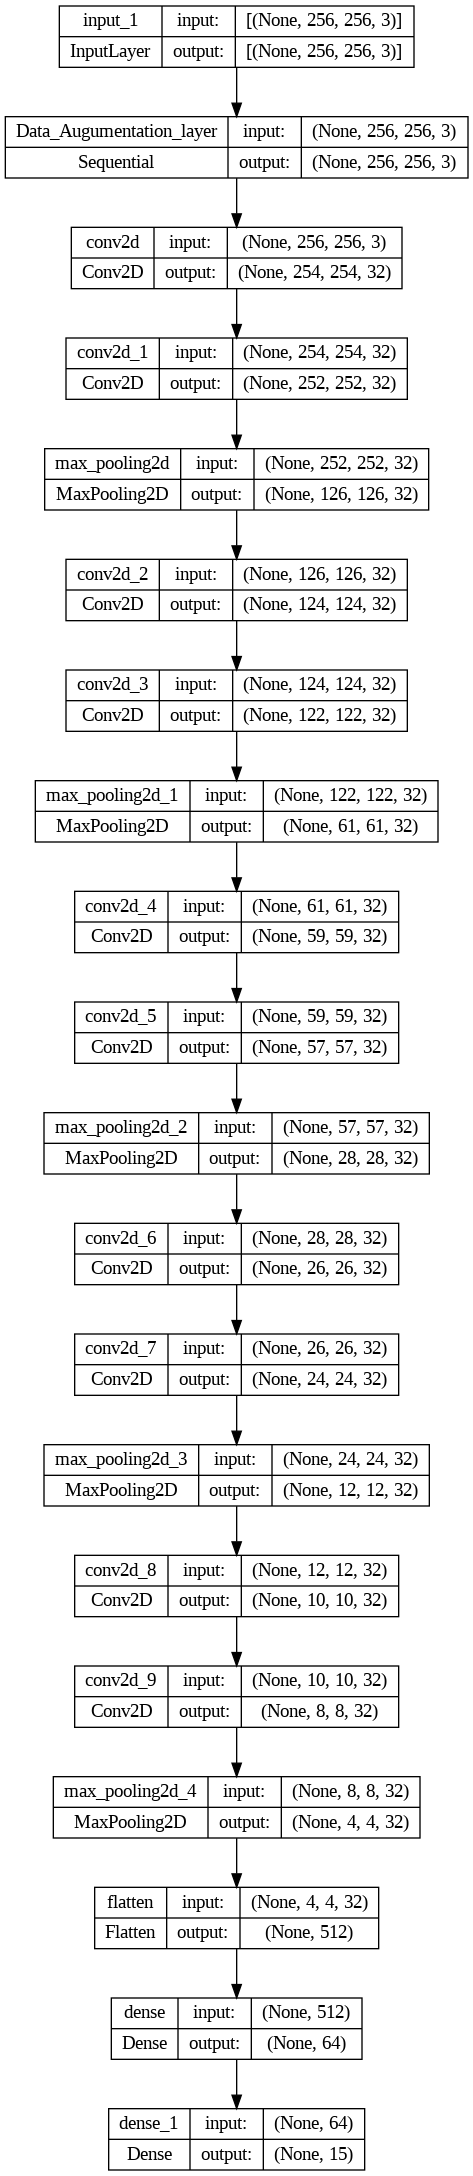

In [ ]:
keras.utils.plot_model(model_1, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:

def model_checkpoint_callback(filepath):
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=f'/content/{filepath}',  # Specify the path to save the best model
        monitor='val_accuracy',   # Choose a metric to monitor (e.g., validation accuracy)
        save_best_only=True,       # Save only the best model
        save_weights_only=False,   # Set to True if you want to save only model weights
        mode='max',               # Set to 'max' for accuracy, 'min' for loss, or 'auto'
        verbose=0,               # Optional: Set to 1 for progress messages
    )
    return model_checkpoint_callback

In [ ]:
train_dataset , len(train_ds.class_names)

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15), dtype=tf.float32, name=None))>,
 15)

In [ ]:
model_1.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = 'adam',
                metrics = ['accuracy'])

history_1 = model_1.fit(train_dataset,
                        epochs = 20,
                        steps_per_epoch = len(train_dataset),
                        validation_data = val_dataset,
                        validation_steps = 0.1*len(val_dataset),
                        callbacks = [model_checkpoint_callback('Model_1_dense')])

Epoch 1/20
516/516 [==============================] - 141s 265ms/step - loss: 0.3371 - accuracy: 0.8853 - val_loss: 0.5003 - val_accuracy: 0.8527
Epoch 2/20
516/516 [==============================] - 121s 234ms/step - loss: 0.3097 - accuracy: 0.8955 - val_loss: 0.2834 - val_accuracy: 0.9062
Epoch 3/20
516/516 [==============================] - 137s 265ms/step - loss: 0.2886 - accuracy: 0.9015 - val_loss: 0.2663 - val_accuracy: 0.8929
Epoch 4/20
516/516 [==============================] - 124s 240ms/step - loss: 0.2967 - accuracy: 0.9017 - val_loss: 0.4013 - val_accuracy: 0.8705
Epoch 5/20
516/516 [==============================] - 131s 254ms/step - loss: 0.2909 - accuracy: 0.9004 - val_loss: 0.2282 - val_accuracy: 0.9241
Epoch 6/20
516/516 [==============================] - 123s 238ms/step - loss: 0.2803 - accuracy: 0.9047 - val_loss: 0.2558 - val_accuracy: 0.8973
Epoch 7/20
516/516 [==============================] - 126s 244ms/step - loss: 0.2745 - accuracy: 0.9066 - val_loss: 0.3427 -

In [ ]:
model_1 = keras.models.load_model('/content/drive/MyDrive/plants_disease_model')

In [ ]:
model_1.evaluate(val_dataset)

64/64 [==============================] - 12s 59ms/step - loss: 0.2133 - accuracy: 0.9185


[0.2133309692144394, 0.91845703125]

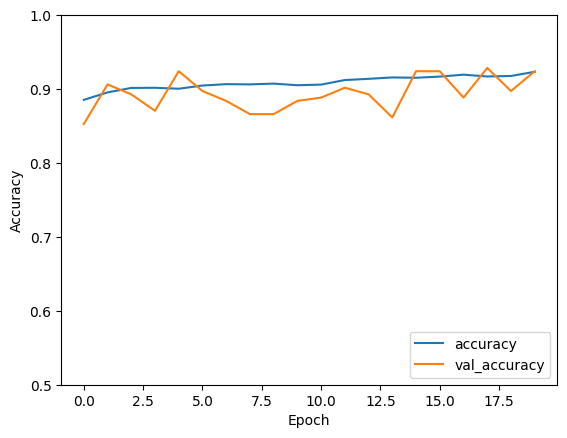

In [ ]:
plt.plot(history_1.history['accuracy'], label='accuracy')
plt.plot(history_1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

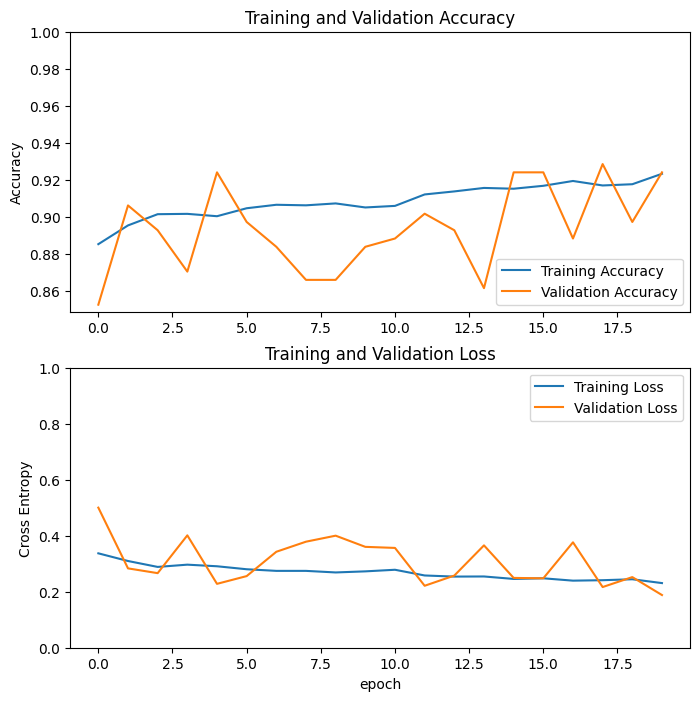

In [ ]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

[21 23 29  2 13  7  5 11 14 24 18 28 20 27 10]


IndexError: ignored

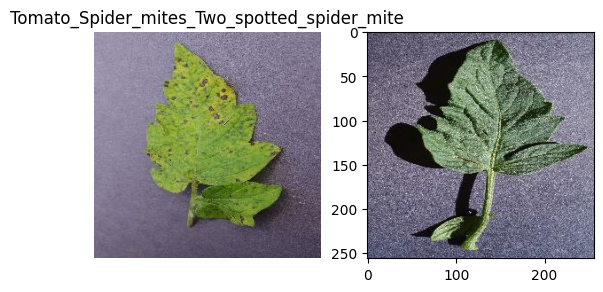

In [ ]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model_1.predict_on_batch(image_batch)
predictions = tf.argmax(predictions[:]).numpy()
print(predictions)
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i-1]])
  plt.axis("off")

## Seperating Test_dataset into image and labels

In [ ]:
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
image_batch.shape , image_batch.dtype , label_batch.shape , label_batch.dtype

((32, 256, 256, 3), dtype('float32'), (32, 15), dtype('float32'))

In [ ]:
preds = model_1.predict(image_batch)
max_preds_index = tf.argmax(preds , axis = 1)
max_preds_index

1/1 [==============================] - 0s 339ms/step


<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([ 1,  6,  1,  7,  5, 12,  6, 12, 10,  1,  8,  1,  2,  5, 10, 11,  6,
        2,  9,  3,  6,  7,  2, 14,  0, 10,  9,  8,  5, 12,  6,  9])>

In [ ]:
v = tf.one_hot(
    max_preds_index,
    depth = 15,
    on_value=1,
    off_value=0,
    axis=1,
    dtype=float,
    name='max_preds'
)

In [ ]:
v.shape , v

(TensorShape([32, 15]),
 <tf.Tensor: shape=(32, 15), dtype=float32, numpy=
 array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0.

In [ ]:
m = tf.keras.metrics.Accuracy(
    name='accuracy', dtype=float
)



m.update_state(
y_true=label_batch,
y_pred=v)

accuracy = m.result()

In [ ]:
accuracy.numpy()

0.99583334

## Fast Api server